<a href="https://colab.research.google.com/github/Koftarik/Data_Processing_and_Machine_Learning/blob/main/6_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Разработать программу, принимающую на вход изображение из категории Imagenet своего варианта и выдающее название категории изображенного объекта и вероятность соответствия его этой категории. Разработать программу, распознающую на изображении с использованием трансферного обучения:
 мужчина/женщина.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

вариант 150 0:string"n02077923"
1:string"sea_lion"

In [ ]:
from os.path import join

image_dir = '../input/imagenetmini-1000/imagenet-mini/train/n02077923/'

image_filenames = [ 'n02077923_215.JPEG', 'n02077923_47.JPEG', '/kaggle/input/mydata1/dolfin.jpeg' ]

img_paths = [join(image_dir, filename) for filename in image_filenames ]

In [ ]:
image_filenames

['n02077923_215.JPEG',
 'n02077923_47.JPEG',
 '/kaggle/input/mydata1/dolfin.jpeg']

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
#The model we'll use was trained with 224x224 resolution images so we'll make them
#have the same resolution here.
image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)

    return(output)

In [ ]:
from tensorflow.keras.applications import ResNet50

my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')

test_data = read_and_prep_images(img_paths)

preds = my_model.predict(test_data)

preds

1/1 [==============================] - 2s 2s/step


array([[2.6289670e-09, 3.0492032e-08, 3.7284107e-07, ..., 4.4830748e-09,
        6.1408931e-09, 2.2154193e-11],
       [3.0460075e-08, 4.0010670e-09, 2.0658590e-06, ..., 8.4414009e-10,
        1.9347649e-08, 1.2893302e-08],
       [1.3029878e-05, 1.2959204e-05, 6.7607932e-02, ..., 1.1089368e-06,
        5.3500759e-07, 5.5398059e-06]], dtype=float32)

In [ ]:
from learntools.deep_learning.decode_predictions import decode_predictions

most_likely_labels = decode_predictions(preds, top=1, class_list_path='../input/resnet50/imagenet_class_index.json')

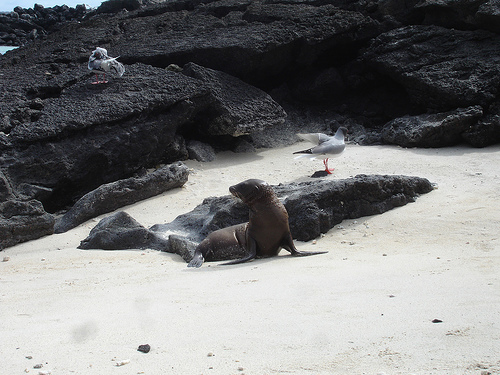

('sea_lion', 0.87547475)


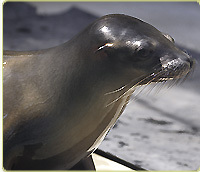

('sea_lion', 0.99391645)


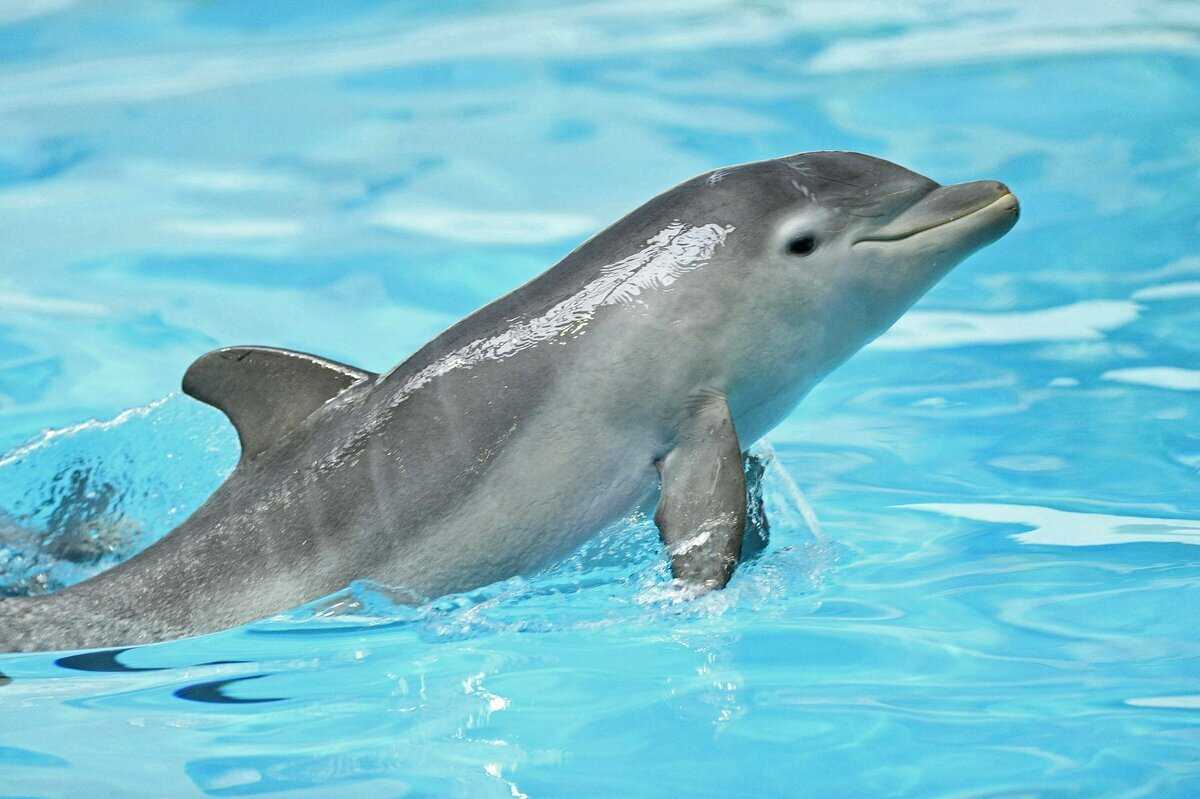

('sea_lion', 0.41002977)


In [ ]:
from IPython.display import Image, display

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    #print("Название категория: ", most_likely_labels[i][0][1], "\nВероятность принадлежности: ", most_likely_labels[i][0][2])
    print(most_likely_labels[i][0][1:])

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2
resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

In [ ]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
'../input/gender-classification-dataset/Training',
target_size=(image_size, image_size),
batch_size=25,
class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
'../input/gender-classification-dataset/Validation',
target_size=(image_size, image_size),
class_mode='categorical')

my_new_model.fit_generator(
train_generator,
steps_per_epoch=6,
validation_data=validation_generator,
validation_steps=1)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.
6/6 [==============================] - 22s 4s/step - loss: 0.6051 - accuracy: 0.6867 - val_loss: 0.4578 - val_accuracy: 0.8438


In [ ]:
image_dir = '../input/gender-classification-dataset/Training/'

image_filenames = ['female/131452.jpg.jpg', 'male/090646.jpg.jpg']

img_paths = [join(image_dir, filename) for filename in image_filenames ]


In [ ]:
test_data = read_and_prep_images(img_paths)

preds = my_new_model.predict(test_data)

preds

array([[0.72151715, 0.2784828 ],
       [0.46520397, 0.53479606]], dtype=float32)

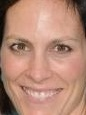

female


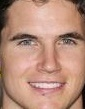

male


In [ ]:
from IPython.display import Image, display

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    if preds[i][1] > preds[i][0]:
        print("male")
    else:
        print("female")